In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def gen_basis(n):
    b = []
    for i in range(n):
        b.append(lambda x, m=i: x ** m)
    return b

In [3]:
basis = gen_basis(2)

In [4]:
def Phi(basis, x):
    res = np.zeros((x.shape[0], len(basis)))
    
    for i in range(np.size(x, axis=0)):
        for j in range(len(basis)):
            res[i, j] = basis[j](x[i])
            
    return res

In [5]:
x = np.arange(0, 10, 1)
#y = np.exp(- (x - 5) ** 2 / 4)
y = 2.0 * x + 1
phi = Phi(basis, x)

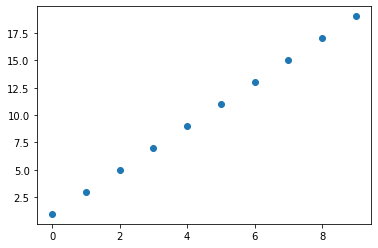

In [6]:
plt.scatter(x, y)

In [7]:
noise_size = int(x.shape[0] * 0.8)
noise_idx = np.random.randint(0, x.shape[0], size=noise_size)
y[noise_idx] += np.random.uniform(-2, 2, size=noise_size)

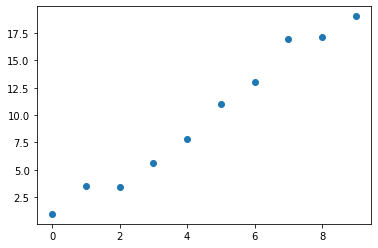

In [8]:
plt.scatter(x, y)

In [39]:
def dd(x):
    return np.linalg.norm(x)

def huber(x):
    n = np.linalg.norm(x)
    d = 0.2
    
    if n < d:
        return x ** 2
    return - d ** 2 + 2 * d * n

In [40]:
def R(phi, a, y, d):
    r = np.zeros((y.shape[0], y.shape[0]))
    for i in range(y.shape[0]):
        r[i, i] = d((phi @ a - y)[i]) / (phi @ a - y)[i]
    return r

In [41]:
def train(phi, x, y, d):
    a = np.random.uniform(-1, 1, size=len(basis))
    r = R(phi, a, y, d)
    for k in range(1000):
        a = np.linalg.solve(phi.T @ r @ phi, phi.T @ r @ y)
        r = R(phi, a, y, d)
    
    return a

In [42]:
a = train(phi, x , y, dd)
a_huber = train(phi, x, y, huber)

In [43]:
def fit(basis, a, x):
    y = np.zeros(x.shape[0])
    for i in range(y.shape[0]):
        for j in range(len(basis)):
            y[i] += a[j] * basis[j](x[i])
    return y

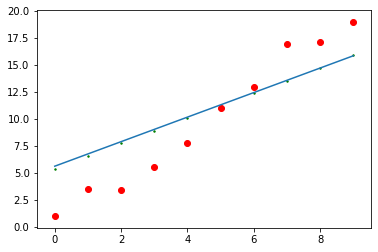

In [44]:
plt.scatter(x, fit(basis, a_huber, x), s=2, c='g')
plt.plot(x, fit(basis, a, x))
plt.scatter(x, y, c='r')
plt.show()